In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['assets/class.mplstyle'])

red = '#E24A33'
blue = '#348ABD'
purple = '#988ED5'
gray = '#777777'
yellow = '#FBC15E'
green = '#8EBA42'
pink = '#FFB5B8'

---

# Astroquery


[SkyView](https://skyview.gsfc.nasa.gov/)

In [33]:
import astroquery
from astroquery.skyview import SkyView

In [34]:
dd = SkyView.list_surveys()

{'Allbands:GOODS/HDF/CDF': ['GOODS: Chandra ACIS HB',
                            'GOODS: Chandra ACIS FB',
                            'GOODS: Chandra ACIS SB',
                            'GOODS: VLT VIMOS U',
                            'GOODS: VLT VIMOS R',
                            'GOODS: HST ACS B',
                            'GOODS: HST ACS V',
                            'GOODS: HST ACS I',
                            'GOODS: HST ACS Z',
                            'Hawaii HDF U',
                            'Hawaii HDF B',
                            'Hawaii HDF V0201',
                            'Hawaii HDF V0401',
                            'Hawaii HDF R',
                            'Hawaii HDF I',
                            'Hawaii HDF z',
                            'Hawaii HDF HK',
                            'GOODS: HST NICMOS',
                            'GOODS: VLT ISAAC J',
                            'GOODS: VLT ISAAC H',
                            'GOODS: 

## Example

In [35]:
from astropy import units as u

image_addresses = SkyView.get_image_list('M109', ['SDSSu', 'SDSSg', 'SDSSr'], 
                                         radius=6*u.arcmin)
for address in image_address es:
    print(address)

https://skyview.gsfc.nasa.gov/tempspace/fits/skv1183414164695_1.fits
https://skyview.gsfc.nasa.gov/tempspace/fits/skv1183414164695_2.fits
https://skyview.gsfc.nasa.gov/tempspace/fits/skv1183414164695_3.fits


In [38]:
import urllib

image_filenames = ['assets/07-M109-u.fits', 'assets/07-M109-g.fits', 
                   'assets/07-M109-r.fits']

for address, fname in zip(image_addresses, image_filenames):
    urllib.request.urlretrieve(address, fname)

HTTPError: HTTP Error 404: Not Found

# FITS files

In [39]:
from astropy.io import fits

R = fits.open('assets/06-M109-r.fits')

In [40]:
R.info()

Filename: assets/06-M109-r.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     126   (300, 300)   float32   


In [30]:
R[0].header

SIMPLE  =                    T / Written by SkyView Wed Aug 28 16:33:52 EDT 2019
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  300 / Width of image                                 
NAXIS2  =                  300 / Height of image                                
CRVAL1  =                179.4 / Reference longitude                            
CRVAL2  =              53.3745 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                150.5 / X reference pixel                              
CRPIX2  =                150

In [31]:
R[0].data

array([[1102., 1112., 1111., ..., 1114., 1118., 1110.],
       [1121., 1115., 1121., ..., 1123., 1109., 1111.],
       [1116., 1114., 1112., ..., 1124., 1110., 1117.],
       ...,
       [1113., 1120., 1117., ..., 1122., 1119., 1125.],
       [1112., 1122., 1119., ..., 1124., 1128., 1125.],
       [1114., 1111., 1106., ..., 1122., 1128., 1126.]], dtype=float32)

In [52]:
import pandas as pd
#plt.hist(R[0].data, bins=100)
df = pd.DataFrame(R[0].data.flatten().T, columns=['D'])
#R[0].data

In [59]:
R[0].data.flatten().std()

138.65161

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,    43.,  5106., 26155., 18815.,  8878.,  6282.,  4794.,
         4268.,  3734.,  3338.,  2266.,  1395.,   924.,   588.,   448.,
          339.,   278.,   226.,   230.,   238.]),
 array([1000., 1010., 1020., 1030., 1040., 1050., 1060., 1070., 1080.,
        1090., 1100., 1110., 1120., 1130., 1140., 1150., 1160., 1170.,
        1180., 1190., 1200., 1210., 1220., 1230., 1240., 1250., 1260.,
        1270., 1280., 1290.]),
 <BarContainer object of 29 artists>)

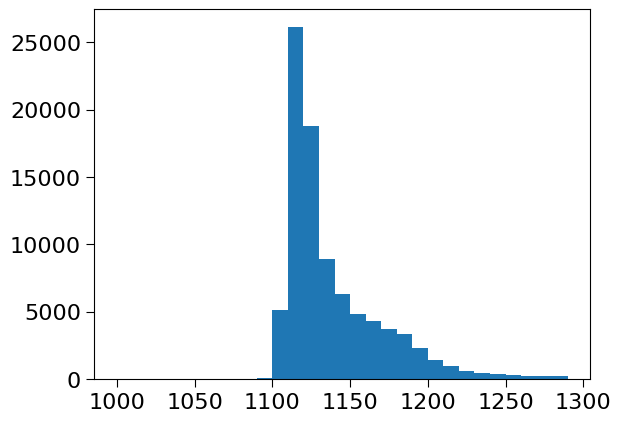

In [62]:
plt.hist(R[0].data.flatten(), bins=np.arange(1000,1300,10))

In [65]:
R[0].data

array([[1102., 1112., 1111., ..., 1114., 1118., 1110.],
       [1121., 1115., 1121., ..., 1123., 1109., 1111.],
       [1116., 1114., 1112., ..., 1124., 1110., 1117.],
       ...,
       [1113., 1120., 1117., ..., 1122., 1119., 1125.],
       [1112., 1122., 1119., ..., 1124., 1128., 1125.],
       [1114., 1111., 1106., ..., 1122., 1128., 1126.]], dtype=float32)

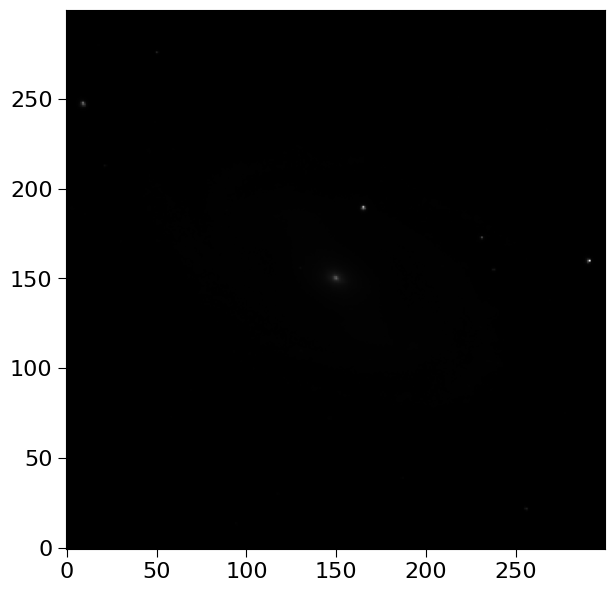

In [64]:
plt.figure(figsize=(7, 7))
plt.imshow(R[0].data, origin='lower', cmap='gray')
plt.show()

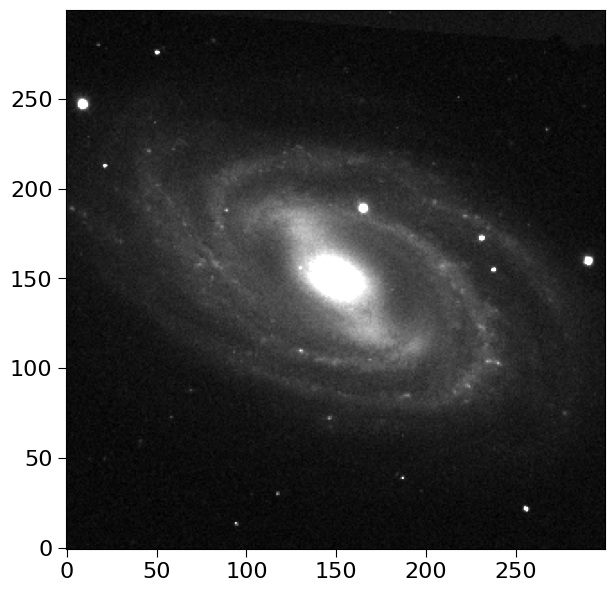

In [32]:
plt.figure(figsize=(7, 7))
plt.imshow(R[0].data, vmin=1100, vmax=1400, origin='lower', cmap='gray')
plt.show()

In [66]:
from astropy.wcs import WCS

wcs = WCS(R[0].header)
wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 179.4  53.3745  
CRPIX : 150.5  150.5  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.0003333333333333334  0.0003333333333333334  
NAXIS : 300  300

In [70]:
wcs.world_to_pixel(skycoord([0,0]))

NameError: name 'skycoord' is not defined

# Publication plots

In [71]:
import aplpy

fig = aplpy.FITSFigure(R[0])
fig.show_grayscale()
fig.add_grid()
fig.show_contour()
fig.add_colorbar()
# fig.add_label(hdu[0].header['CRVAL1'], hdu[0].header['CRVAL2'], "Center")

ModuleNotFoundError: No module named 'aplpy'

# Coordinate conversions and distances

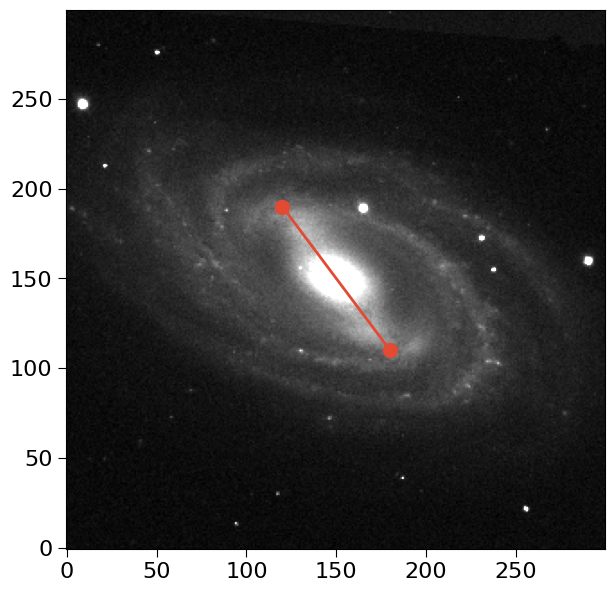

In [17]:
pix_0 = [120, 190]
pix_f = [180, 110]

plt.figure(figsize=(7, 7))
plt.imshow(R[0].data, vmin=1100, vmax=1400, origin='lower', cmap='gray')

plt.plot([pix_0[0], pix_f[0]], [pix_0[1], pix_f[1]], ls='-', marker='o', color=red)


plt.show()

In [18]:
ra_dec = wcs.all_pix2world([pix_0, pix_f], 0)
print(ra_dec)

[[179.41648801  53.38799886]
 [179.38296375  53.36133212]]


In [ ]:
from astropy.coordinates import SkyCoord

coord1 = SkyCoord(ra=ra_dec[0][0]*u.deg, dec=ra_dec[0][1]*u.deg)
coord2 = SkyCoord(ra=ra_dec[1][0]*u.deg, dec=ra_dec[1][1]*u.deg)

In [ ]:
coord1.separation(coord2)

# Color Images

In [72]:
def stand(A):
    A = np.arcsinh(A)
    A = A - A.min()
    A = A / 4 / A.std()
    A[A>1] = 1.
    return(A)

r = fits.open('assets/06-M109-r.fits')
g = fits.open('assets/06-M109-g.fits')
u = fits.open('assets/06-M109-u.fits')

R = stand(r[0].data)
G = stand(g[0].data)
B = stand(u[0].data)

(-0.5, 299.5, -0.5, 299.5)

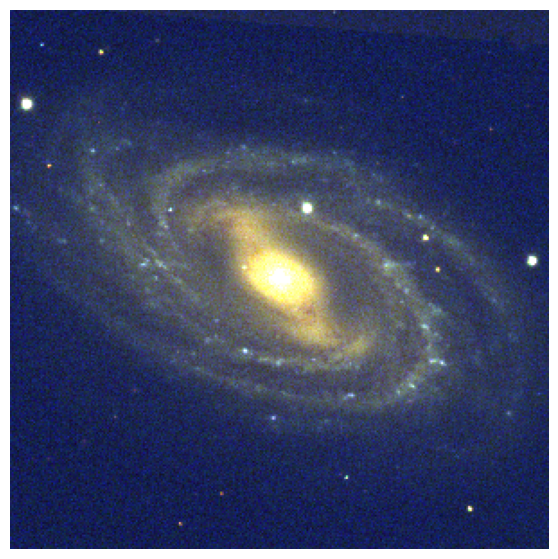

In [73]:
rgbimg = np.array([R.T, G.T, B.T]).T

plt.figure(figsize=(7, 7))
plt.imshow(rgbimg, origin='lower')
plt.axis('off')